# Assignment 8

Plotting with `matplotlib`

## Problem 1

Use the data in [poro_perm.csv](poro_perm.csv) to reproduce the following plot with `matplotlib` in Python.

<img src="./images/poro_perm.png" width=700>

Since you've already developed fitting routines in [Assignment 7](https://github.com/PGE323M-Students/assignment7/) you should use them to perform the analysis on the data.  To avoid having to reproduce or copy the code from Assignment 7, you can load the class directly.  First, from the Terminal command line, run the following command to convert the Jupyter notebook into a regular Python file

```bash
jupyter nbconvert assignment7.ipynb --to python
```

then move the newly created `assignment7.py` into this repository, i.e. the same location as `assignment8.ipynb` and execute the following line in this notebook

```python
from assignment7 import KozenyCarmen
```

This will load the `KozenyCarmen` class directly into the namespace of the notebook and it will be available for use.  If you use this approach, don't forget to add `assignment7.py` to this repository when you commit your final solution for testing.

Please note that the plot must be **exactly the same** in order for the tests to pass, so take care to note the small details.  Here are a couple of tips:

 * For plotting the fit lines, use a Numpy `linspace` that goes from 0 to 0.012 with 50 points.
 
 * The $\LaTeX$ source for the $x$-axis label is `\frac{\phi^3}{(1-\phi)^2}`.  It shouldn't be too difficult for you to figure out the $y$-axis label.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from assignment7 import KozenyCarmen

In [76]:
def kozeny_carmen_plot(filename, **kwargs):   
     
    kc_instance = KozenyCarmen(filename)
    m_through0 = kc_instance.fit_through_zero()
    b, m_fit = kc_instance.fit()

    x = np.linspace(0,0.012,50)


    df=kc_instance.df

    phi = df['porosity'].values
    k = df['permeability'].values
    kc = phi**3/(1-phi)**2
    
    fig, ax = plt.subplots(**kwargs)
    #Add plot commands here

    ax.scatter(kc,k,color='k', label='Data')
    ax.plot(x,x*m_fit+b,'r',label='Fit')
    ax.plot(x,x*m_through0,'b',label='Fit Through Zero')
    ax.grid()
    ax.legend(loc='upper left')
    ax.set_xlabel(r'$\frac{\phi^3}{(1-\phi)^2}$')
    ax.set_ylabel('$\kappa \, (mD)$' )

    return fig

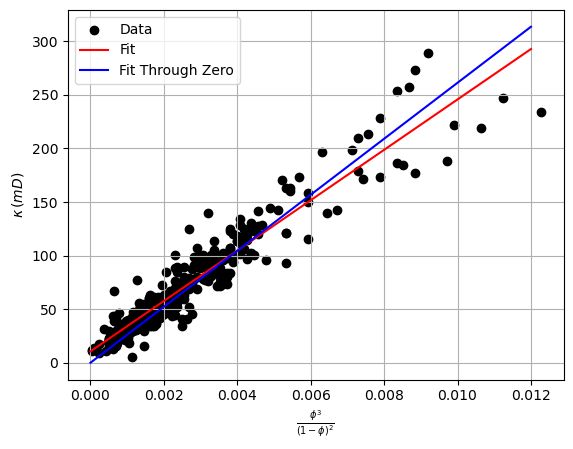

In [77]:
trial = kozeny_carmen_plot('poro_perm.csv')


## Problem 2

Complete the function below to create the following contour plot.

<img src='./images/Nechelik.png' width=800>

Read in the [Nechelik.dat](Nechelik.dat) file which contains actual, estimated porosity of a field at equally spaced $x$,$y$ positions in the reservoir. Note that there are $54$ grid blocks/porosity values in the $x$ direction and $44$ in the $y$ direction i.e. you need a $44 \times 54$ porosity matrix. Each grid block is a square with sides $130.75$ ft.

As in Problem 1, the plot must be **exactly the same** for the tests to pass.  Refer to the tips above, and be sure to set the aspect ratio of the plot to `'equal'`.

In [10]:
def contour_plot(filename, **kwargs):
    
    data = np.loadtxt(filename)
    porosity = data.reshape(54,44)
    x = np.arange(54)*130.75
    y = np.arange(44)*130.75  
    X,Y = np.meshgrid(x,y[::-1])
    z = np.where(np.isnan(data), np.nan,data)

    fig, ax = plt.subplots(**kwargs)

    c = ax.contourf(X,Y,z)
    cbar = fig.colorbar(c)
    cbar.ax.set_title('Porosity')
    cbar.ax.set_ylabel('Depth')
    cbar. ax.set_aspect('equal')
    
    #Add plot commands here
    
    return fig

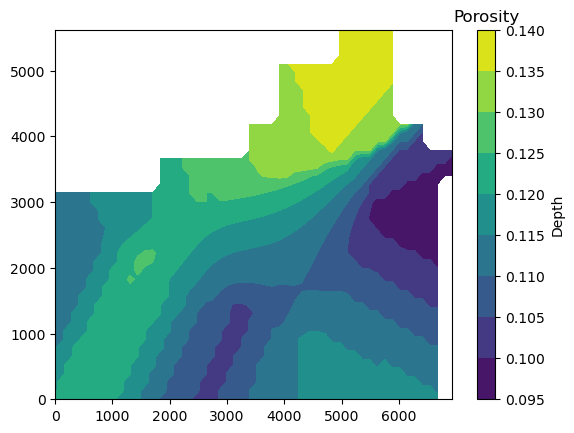

In [11]:
test = contour_plot('Nechelik.dat')